In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from shutil import copyfile
from os import getcwd

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10964693245913643807
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2254123828
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1103151123014907950
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
print(len(os.listdir('./data/smoker/')))
print(len(os.listdir('./data/non_smoker')))

# Expected Output:
# 333
# 363

313
351


In [7]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    os.mkdir('./data_tf')
    os.mkdir('./data_tf/smoker-v-non_smoker')
    os.mkdir('./data_tf/smoker-v-non_smoker/training')
    os.mkdir('./data_tf/smoker-v-non_smoker/testing')
    os.mkdir('./data_tf/smoker-v-non_smoker/training/smoker')
    os.mkdir('./data_tf/smoker-v-non_smoker/training/non_smoker')
    os.mkdir('./data_tf/smoker-v-non_smoker/testing/smoker')
    os.mkdir('./data_tf/smoker-v-non_smoker/testing/non_smoker')
except OSError:
    pass

In [8]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    temp_files = [f for f in os.listdir(SOURCE) if os.path.getsize(SOURCE+f)>0]
    shuffled_files = random.sample(temp_files, len(temp_files))
    
    for f in shuffled_files[:int(len(temp_files) * SPLIT_SIZE)]:
        copyfile(SOURCE+f, TRAINING+f)
        
    for f in shuffled_files[int(len(temp_files) * SPLIT_SIZE):]:
        copyfile(SOURCE+f, TESTING+f)

In [9]:
SMOKER_SOURCE_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data/smoker/"
TRAINING_SMOKER_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/training/smoker/"
TESTING_SMOKER_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/testing/smoker/"
NON_SMOKER_SOURCE_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data/non_smoker/"
TRAINING_NON_SMOKER_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/training/non_smoker/"
TESTING_NON_SMOKER_DIR = "C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/testing/non_smoker/"

split_size = .8
split_data(SMOKER_SOURCE_DIR, TRAINING_SMOKER_DIR, TESTING_SMOKER_DIR, split_size)
split_data(NON_SMOKER_SOURCE_DIR, TRAINING_NON_SMOKER_DIR, TESTING_NON_SMOKER_DIR, split_size)

In [10]:
print(len(os.listdir('./data_tf/smoker-v-non_smoker/training/smoker/')))
print(len(os.listdir('./data_tf/smoker-v-non_smoker/testing/smoker/')))
print(len(os.listdir('./data_tf/smoker-v-non_smoker/training/non_smoker/')))
print(len(os.listdir('./data_tf/smoker-v-non_smoker/testing/non_smoker/')))

251
63
280
71


In [ ]:
baseline_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
baseline_model.summary()

In [20]:
TRAINING_DIR = 'C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/training/'
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range=60,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   shear_range=0.4,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )

# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        batch_size=16,
        target_size=(150,150),
        class_mode='binary')

VALIDATION_DIR = 'C:/Users/yomke/Desktop/DS/portfolio_DS/smoker_detection_deeplearning/data_tf/smoker-v-non_smoker/testing/'
validation_datagen = ImageDataGenerator(rescale= 1./255.)

# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        batch_size=16,
        target_size=(150,150),
        class_mode = 'binary')

Found 531 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [21]:
history = baseline_model.fit(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

NameError: name 'baseline_model' is not defined

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Transfer Learning

In [13]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model
pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top= False,
                                weights= 'imagenet')

In [14]:
# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [15]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [16]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a dropout rate of 0.3
x = layers.Dropout(.3)(x)   
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.3
x = layers.Dropout(.3)(x)  
# Add a fully connected layer with 128 hidden units and ReLU activation
x = layers.Dense(128, activation = 'relu')(x)
# Add a dropout rate of 0.3
x = layers.Dropout(.3)(x)  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input,x)


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [22]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator,
                    batch_size=16,
                    #steps_per_epoch = 100,
                    #validation_steps = 50,
                    verbose = 1,
                    callbacks=[es]
                             )

Epoch 1/30
13/34 [==========>...................] - ETA: 6s - loss: 2.2243 - accuracy: 0.4663

C:\ProgramData\Anaconda3\envs\tf26\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


34/34 [==============================] - 24s 480ms/step - loss: 1.5427 - accuracy: 0.5612 - val_loss: 0.4544 - val_accuracy: 0.8134
Epoch 2/30
34/34 [==============================] - 14s 405ms/step - loss: 0.6371 - accuracy: 0.7081 - val_loss: 0.4353 - val_accuracy: 0.8060
Epoch 3/30
34/34 [==============================] - 14s 411ms/step - loss: 0.6315 - accuracy: 0.7100 - val_loss: 0.4624 - val_accuracy: 0.7985
Epoch 4/30
34/34 [==============================] - 14s 404ms/step - loss: 0.5779 - accuracy: 0.7175 - val_loss: 0.3355 - val_accuracy: 0.8731
Epoch 5/30
34/34 [==============================] - 14s 404ms/step - loss: 0.5305 - accuracy: 0.7458 - val_loss: 0.4200 - val_accuracy: 0.8060
Epoch 6/30
34/34 [==============================] - 14s 402ms/step - loss: 0.4598 - accuracy: 0.8041 - val_loss: 0.3545 - val_accuracy: 0.8731
Epoch 7/30
34/34 [==============================] - 14s 403ms/step - loss: 0.4839 - accuracy: 0.7928 - val_loss: 0.3073 - val_accuracy: 0.8806
Epoch 8/30

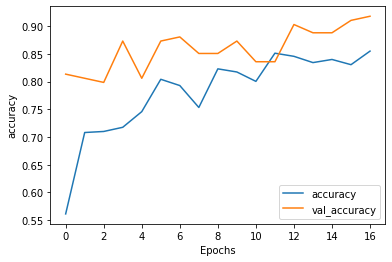

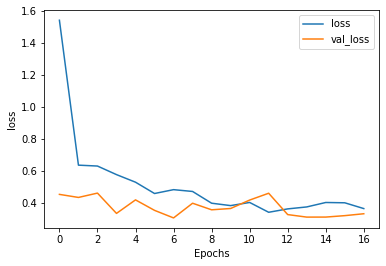

In [23]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

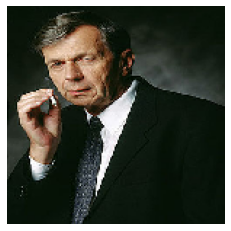

[[1.]]


In [28]:
# predicting images
from tensorflow.keras.preprocessing import image
import numpy as np

path = "./demo/img.jpg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)

plt.imshow(img)
plt.axis('Off')
plt.show()
print(classes)